In [1]:
# Análise de Dados de Preços de Combustíveis do Ano de 2021 no Brasil
# Dados Obtidos na Plataforma - Dados Abertos do Governo Federal em Parceria com a Agência Nacional do Petróleo, Gás Natural e 
# Biocombustíveis, ANP
# Notebook desenvolvido por Thiago Barros - Graduando de Engenharia Mecânica e Estudante de Análise de Dados

In [2]:
# Importação das Bibliotecas Necessárias Para as Análises

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

In [4]:
# Importação dos dados em formato csv para a biblioteca pandas

In [5]:
primeiro_semestre = pd.read_csv('/kaggle/input/combustiveis-2021/ca_21_01.csv', sep=";", decimal = ",", on_bad_lines="skip", encoding = "latin-1")
segundo_semestre = pd.read_csv('/kaggle/input/combustiveis-2021/ca_21_02.csv', sep=';', decimal = ",", on_bad_lines = "skip", encoding = "latin-1")

In [6]:
# Verificando as primeiras linhas dos dados

primeiro_semestre.head(8)

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,S,RS,SAO LEOPOLDO,GASOLINA,01/01/2021,4.599,NaN,R$ / litro,BRANCA
1,S,RS,SAO LEOPOLDO,ETANOL,01/01/2021,4.199,NaN,R$ / litro,BRANCA
2,S,RS,SAO LEOPOLDO,GASOLINA ADITIVADA,01/01/2021,4.799,NaN,R$ / litro,BRANCA
3,S,RS,SAO LEOPOLDO,DIESEL,01/01/2021,3.499,NaN,R$ / litro,BRANCA
4,S,RS,SAO LEOPOLDO,DIESEL S10,01/01/2021,3.599,NaN,R$ / litro,BRANCA
5,S,RS,NOVO HAMBURGO,GASOLINA,01/01/2021,4.459,NaN,R$ / litro,BRANCA
6,S,RS,NOVO HAMBURGO,ETANOL,01/01/2021,4.199,NaN,R$ / litro,BRANCA
7,S,RS,NOVO HAMBURGO,GASOLINA ADITIVADA,01/01/2021,4.499,NaN,R$ / litro,BRANCA


In [7]:
segundo_semestre.head(8)

,Regiao - Sigla,Estado - Sigla,Municipio,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,MARACANAU,GASOLINA ADITIVADA,01/07/2021,5.699,NaN,R$ / litro,IPIRANGA
1,NE,CE,MARACANAU,GASOLINA,01/07/2021,5.499,NaN,R$ / litro,IPIRANGA
2,NE,CE,MARACANAU,DIESEL S10,01/07/2021,4.699,NaN,R$ / litro,IPIRANGA
3,NE,CE,MARACANAU,ETANOL,01/07/2021,5.200,NaN,R$ / litro,IPIRANGA
4,NE,CE,MARACANAU,GASOLINA,01/07/2021,5.490,NaN,R$ / litro,VIBRA ENERGIA
5,NE,CE,MARACANAU,DIESEL S10,01/07/2021,4.490,NaN,R$ / litro,VIBRA ENERGIA
6,NE,CE,MARACANAU,ETANOL,01/07/2021,4.990,NaN,R$ / litro,VIBRA ENERGIA
7,NE,CE,MARACANAU,GASOLINA ADITIVADA,01/07/2021,5.499,NaN,R$ / litro,RAIZEN


In [8]:
# Perguntas a Básicas a Serem Feitas em Relação aos Dados 

# 1° Qual o número de amostras coletadas ao todo
# 2° Qual o número de amostras coletadas (Por Região, Por Estado, Por Municipio, Por Produto e Por Bandeira)
# 3° Qual a Média e a Variação do Preço do Combustível pelas Categorias Anteriores

In [9]:
# Contando o Número de Amostras ao Todo
primeiro_semestre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334681 entries, 0 to 334680
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     334681 non-null  object 
 1   Estado - Sigla     334681 non-null  object 
 2   Municipio          334681 non-null  object 
 3   Produto            334681 non-null  object 
 4   Data da Coleta     334681 non-null  object 
 5   Valor de Venda     334681 non-null  float64
 6   Valor de Compra    0 non-null       float64
 7   Unidade de Medida  334681 non-null  object 
 8   Bandeira           334681 non-null  object 
dtypes: float64(2), object(7)
memory usage: 23.0+ MB


In [10]:
segundo_semestre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472856 entries, 0 to 472855
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     472856 non-null  object 
 1   Estado - Sigla     472856 non-null  object 
 2   Municipio          472856 non-null  object 
 3   Produto            472856 non-null  object 
 4   Data da Coleta     472856 non-null  object 
 5   Valor de Venda     472856 non-null  float64
 6   Valor de Compra    0 non-null       float64
 7   Unidade de Medida  472856 non-null  object 
 8   Bandeira           472856 non-null  object 
dtypes: float64(2), object(7)
memory usage: 32.5+ MB


Temos ao todo, 334.681 amostras coletadas ao todo no primeiro semestre e 472.856 no segundo semestre

In [11]:
# Contando o Número de Amostras pelas Classificações - Primeiro Semestre e Segundo Semestre
primeiro_semestre["Regiao - Sigla"].value_counts()

SE    166870
NE     64801
S      53930
CO     28861
N      20219
Name: Regiao - Sigla, dtype: int64

In [12]:
segundo_semestre["Regiao - Sigla"].value_counts()

SE    234834
NE     88728
S      81634
CO     40686
N      26974
Name: Regiao - Sigla, dtype: int64

In [13]:
primeiro_semestre["Estado - Sigla"].value_counts()

SP    111520
RJ     25186
MG     23190
PR     20147
RS     19334
BA     15964
SC     14449
CE     14377
MT     10728
PE      9757
GO      8021
ES      6974
MA      5429
AM      5332
MS      5148
DF      4964
PI      4233
RN      4111
PA      4007
AL      3950
PB      3759
AC      3422
RO      3375
SE      3221
TO      1946
RR      1158
AP       979
Name: Estado - Sigla, dtype: int64

In [14]:
segundo_semestre["Estado - Sigla"].value_counts()

SP    149111
MG     43170
RJ     34772
RS     31720
PR     28960
BA     22242
SC     20954
CE     20398
PE     15887
MT     15117
GO     14826
ES      7781
PA      7353
MS      6639
RN      6086
PB      5765
PI      5508
AM      5110
RO      4945
MA      4733
AL      4607
DF      4104
AC      4101
SE      3502
TO      3225
RR      1235
AP      1005
Name: Estado - Sigla, dtype: int64

In [15]:
municipios_contagem = pd.DataFrame(primeiro_semestre["Municipio"].value_counts())
municipios_contagem.head(8)

,Municipio
SAO PAULO,17017
FORTALEZA,9255
RIO DE JANEIRO,6801
SALVADOR,6602
CUIABA,6552
BRASILIA,4964
GOIANIA,4710
CAMPINAS,4543


In [16]:
municipios_contagem2 = pd.DataFrame(segundo_semestre["Municipio"].value_counts())
municipios_contagem2.head(10)

,Municipio
SAO PAULO,14580
FORTALEZA,10449
CUIABA,6869
SALVADOR,6800
RIO DE JANEIRO,5773
CAMPINAS,4642
TERESINA,4199
GOIANIA,4137
BRASILIA,4104
CURITIBA,4026


In [17]:
primeiro_semestre["Produto"].value_counts()

GASOLINA              85260
ETANOL                76843
DIESEL S10            67427
GASOLINA ADITIVADA    63190
DIESEL                34717
GNV                    7244
Name: Produto, dtype: int64

In [18]:
segundo_semestre["Produto"].value_counts()

GASOLINA              119166
ETANOL                106029
DIESEL S10             97069
GASOLINA ADITIVADA     88861
DIESEL                 53188
GNV                     8543
Name: Produto, dtype: int64

In [19]:
primeiro_semestre["Bandeira"].value_counts()

BRANCA                          118781
RAIZEN                           58394
IPIRANGA                         57651
VIBRA ENERGIA                    53891
PETROBRAS DISTRIBUIDORA S.A.     19532
ALESAT                            7101
SABBÁ                             4354
ATEM' S                           2593
RAIZEN MIME                       1443
RODOIL                            1380
EQUADOR                           1182
SP                                 924
IDAZA                              738
TAURUS                             667
DISLUB                             652
PETROX DISTRIBUIDORA               572
SETTA DISTRIBUIDORA                503
CIAPETRO                           382
ATLÂNTICA                          366
STANG                              322
AMERICANOIL                        303
TOTAL BRASIL                       298
RIO BRANCO                         291
TDC DISTRIBUIDORA                  250
SIMARELLI                          204
PETROBAHIA               

In [20]:
segundo_semestre["Bandeira"].value_counts()

BRANCA                  172260
VIBRA ENERGIA           102831
IPIRANGA                 80107
RAIZEN                   76567
ALESAT                   10308
SABBÁ                     5302
RAIZEN MIME               2493
RODOIL                    2289
ATEM' S                   2228
EQUADOR                   1806
SP                        1777
TAURUS                    1343
IDAZA                     1081
DISLUB                    1011
CIAPETRO                   873
CHARRUA                    806
STANG                      793
PETROX DISTRIBUIDORA       788
RIO BRANCO                 691
SIMARELLI                  535
SETTA DISTRIBUIDORA        485
MAXSUL                     478
TDC DISTRIBUIDORA          469
TOTAL BRASIL               468
AMERICANOIL                404
POTENCIAL                  399
FAN                        371
PETROBAHIA                 324
ATLÂNTICA                  296
DIBRAPE                    293
FEDERAL ENERGIA            266
PETROSERRA                 264
SUL COMB

In [21]:
# Analizando as Métricas dos Dados Obtidos

In [22]:
# Qual foi o preço médio do combustível no Brasil no primeiro semestre, no segundo semestre e no ano de 2021?

# Como a base de dados possui o preço do combustível de todos os tipos, convém filtrar as médias por combustível

# Preços Médios por Combustível

precos= pd.DataFrame({"Produto":primeiro_semestre["Produto"],"Preco":primeiro_semestre["Valor de Venda"]})
precos2= pd.DataFrame({"Produto":segundo_semestre["Produto"],"Preco":segundo_semestre["Valor de Venda"]})
empilhado = precos.pivot(columns = "Produto", values = "Preco")
empilhado2 = precos2.pivot(columns = "Produto", values = "Preco")
media_primeiro=pd.DataFrame(empilhado.mean(skipna = True))
media_segundo = pd.DataFrame(empilhado2.mean(skipna = True))

In [23]:
media_dos_precos = media_primeiro.merge(media_segundo,on="Produto")
media_dos_precos["Aumento %"] = ((media_dos_precos["0_y"]-media_dos_precos["0_x"])/media_dos_precos["0_x"])*100
media_dos_precos.head(8)

,0_x,0_y,Aumento %
Produto,,,
DIESEL,4.256016,4.980185,17.015179
DIESEL S10,4.309581,5.040499,16.960296
ETANOL,4.140298,5.055695,22.109461
GASOLINA,5.346718,6.273807,17.339421
GASOLINA ADITIVADA,5.495662,6.422064,16.856953
GNV,3.479949,4.236550,21.741722


Os valores mostram que o Etanol sofreu maior aumento percentual de preço entre o primeiro e o segundo semestre do ano de 2021.

In [24]:
# Qual a dispersão dos valores dos preços?

empilhado.std(skipna = True)


Produto
DIESEL                0.387468
DIESEL S10            0.371717
ETANOL                0.626680
GASOLINA              0.500966
GASOLINA ADITIVADA    0.509263
GNV                   0.468441
dtype: float64

In [25]:
empilhado2.std(skipna = True)

Produto
DIESEL                0.427492
DIESEL S10            0.427569
ETANOL                0.621976
GASOLINA              0.513386
GASOLINA ADITIVADA    0.516486
GNV                   0.464332
dtype: float64

Os dados anteriores representam a estatistica descritiva básica que usamos para entender alguns aspectos da base de dados que possuimos.
Um dos aspectos importantes para a análise científica dos dados é a capacidade de gerar previsões referente aos dados relacionados.

In [26]:
# Segunda Parte: Análise Temporal dos Dados

In [27]:
# Qual a variação dos preços dos combustíveis ao longo do tempo em todas as regiões do Brasil?

# Estratificando por Região

dados_1 = primeiro_semestre.filter(items = ["Regiao - Sigla","Produto","Data da Coleta","Valor de Venda"])
sul = dados_1.loc[dados_1["Regiao - Sigla"]=="S"]
sudeste = dados_1.loc[dados_1["Regiao - Sigla"]=="SE"]
nordeste = dados_1.loc[dados_1["Regiao - Sigla"]=="NE"]
norte = dados_1.loc[dados_1["Regiao - Sigla"]=="N"]
centro_oeste = dados_1.loc[dados_1["Regiao - Sigla"]=="CO"]

In [28]:
# Região Nordeste - Gasolina
gasolina_nordeste = nordeste.loc[nordeste["Produto"] == "GASOLINA"]
gasolina_nordeste = gasolina_nordeste.drop(columns = ["Regiao - Sigla","Produto"])
gasolina_nordeste = gasolina_nordeste.pivot(columns = "Data da Coleta", values = "Valor de Venda")
gasolina_nordeste = pd.DataFrame(gasolina_nordeste.mean(skipna = True)).reset_index().rename(columns = {0:"Preço Medio"})
gasolina_nordeste['Data da Coleta'] = pd.to_datetime(gasolina_nordeste['Data da Coleta'], format='%d/%m/%Y')
gasolina_nordeste = gasolina_nordeste.sort_values("Data da Coleta").reset_index().drop(columns = "index")
gasolina_nordeste.head(10)

,Data da Coleta,Preço Medio
0,2021-01-03,4.720893
1,2021-01-04,4.717147
2,2021-01-05,4.688092
3,2021-01-06,4.677315
4,2021-01-07,4.625421
5,2021-01-10,4.749753
6,2021-01-11,4.721319
7,2021-01-12,4.703575
8,2021-01-13,4.608488
9,2021-01-14,4.696235


Com a filtragem anterior, consegimos calcular as médias de preços da Gasolina no Nordeste Brasileiro com base no dia da coleta. Podemos plotar os valores para avaliar a variação das médias ao longo do tempo. Também foi feito o ordenamento dos dados para que a curva de tendencia mostrasse o crescimento ao longo do tempo das médias.

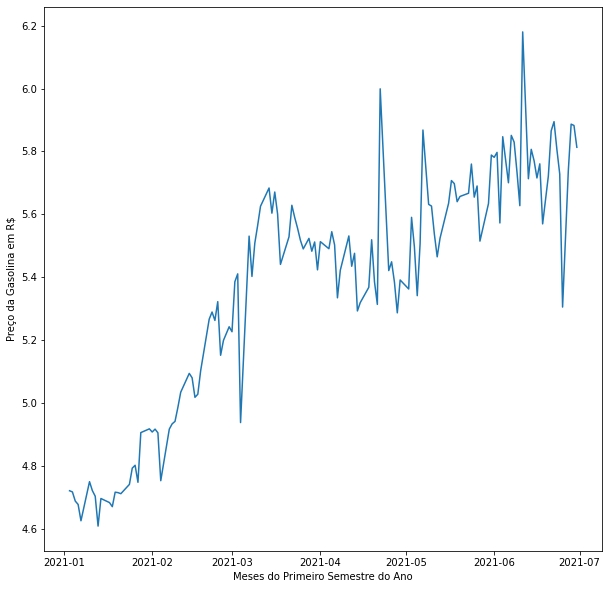

In [29]:
plt.figure(figsize=(10,10))
plt.plot(gasolina_nordeste["Data da Coleta"],gasolina_nordeste["Preço Medio"])
plt.xlabel("Meses do Primeiro Semestre do Ano")
plt.ylabel("Preço da Gasolina em R$")
plt.show()

Vamos reutilizar o código agora para a região norte e comparar os dados com a região nordeste.

In [30]:
# Região Norte - Gasolina
gasolina_norte = norte.loc[norte["Produto"] == "GASOLINA"]
gasolina_norte = gasolina_norte.drop(columns = ["Regiao - Sigla","Produto"])
gasolina_norte = gasolina_norte.pivot(columns = "Data da Coleta", values = "Valor de Venda")
gasolina_norte = pd.DataFrame(gasolina_norte.mean(skipna = True)).reset_index().rename(columns = {0:"Preço Medio"})
gasolina_norte['Data da Coleta'] = pd.to_datetime(gasolina_norte['Data da Coleta'], format='%d/%m/%Y')
gasolina_norte = gasolina_norte.sort_values("Data da Coleta").reset_index().drop(columns = "index")
gasolina_norte.head(10)

,Data da Coleta,Preço Medio
0,2021-01-03,4.568397
1,2021-01-04,4.636156
2,2021-01-05,4.561383
3,2021-01-06,5.014667
4,2021-01-10,4.519509
5,2021-01-11,4.442973
6,2021-01-12,4.791441
7,2021-01-13,4.583333
8,2021-01-17,4.487541
9,2021-01-18,4.420609


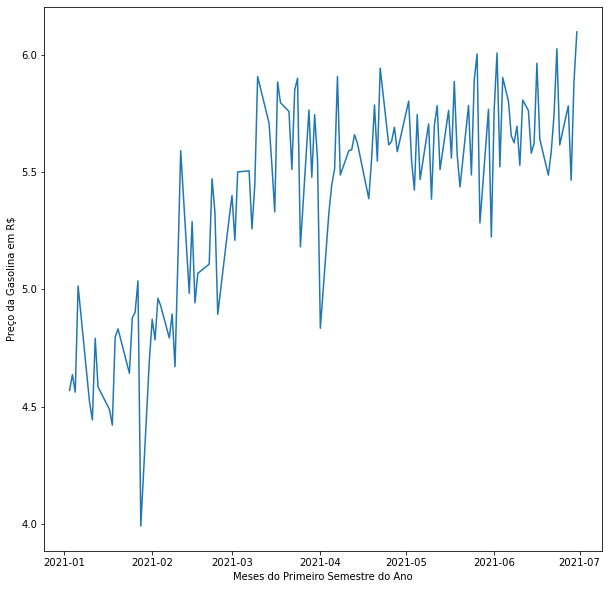

In [31]:
plt.figure(figsize=(10,10))
plt.plot(gasolina_norte["Data da Coleta"],gasolina_norte["Preço Medio"])
plt.xlabel("Meses do Primeiro Semestre do Ano")
plt.ylabel("Preço da Gasolina em R$")
plt.show()

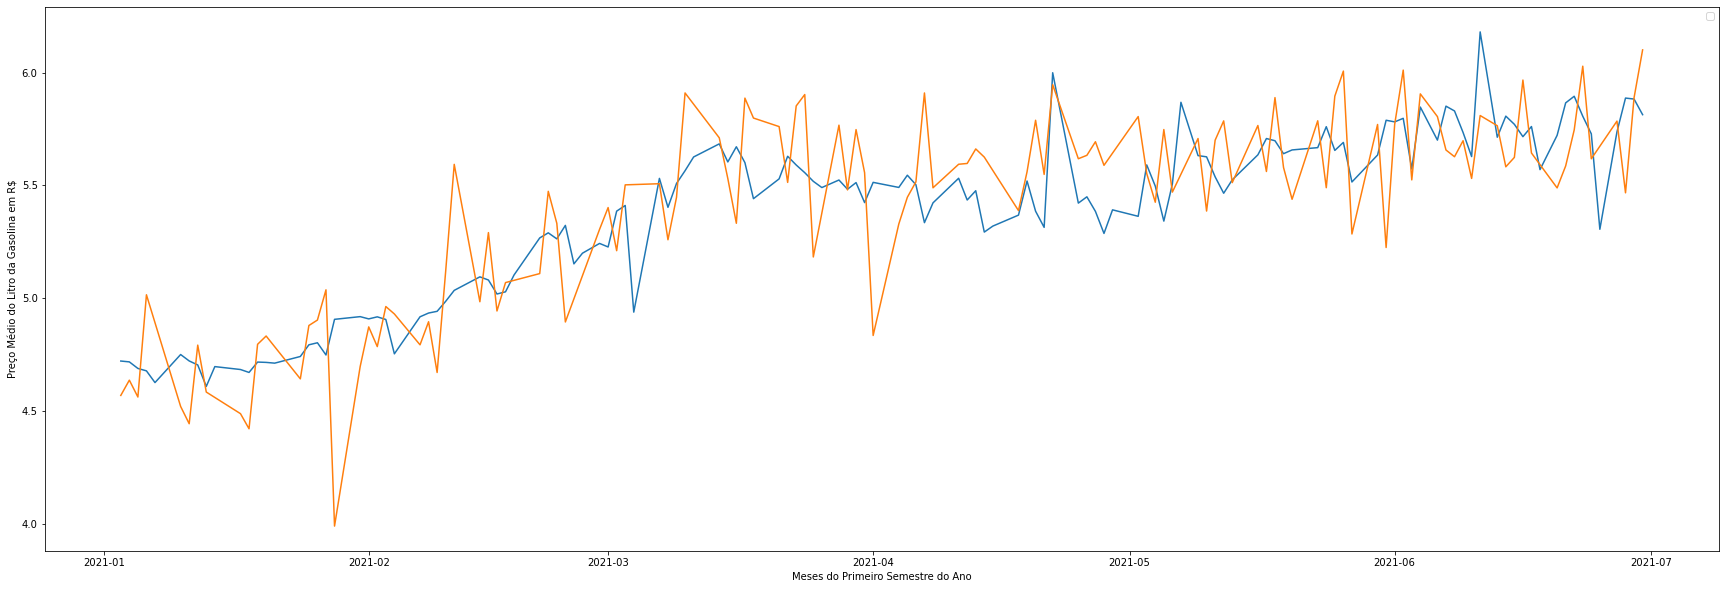

In [32]:
plt.figure(figsize=(30,10))
plt.plot(gasolina_nordeste["Data da Coleta"],gasolina_nordeste["Preço Medio"])
plt.plot(gasolina_norte["Data da Coleta"],gasolina_norte["Preço Medio"])
plt.legend()
plt.xlabel("Meses do Primeiro Semestre do Ano")
plt.ylabel("Preço Médio do Litro da Gasolina em R$")
plt.show()